# Redes Neurais com Keras

In [24]:
from tensorflow import keras

O keras.sequential permite a criação de uma rede neural unindo camadas

A camada Dense é uma camada definida no Keras que promove os cálculos e transformações utilizadas na criação de um modelo.

* Precisamos definir nela quantos neurônios ela conterá através do parâmetro units e podemos também definir a quantidade de entradas/características
que os dados irão conter, para a implementação, vamos começar com dois.


In [25]:
modelo = keras.Sequential([keras.layers.Dense(units=1, input_shape=[2], name="neuronio")]) # Perceptron



Explicação:

  O Sequential cria um modelo muito simples (um dos mais simples no Keras) de redes neurais. Desse modo, é construida somente uma única pilha de camadas sequencialmente conectadas.
  A camada Dense é criada com 1 neurônio, representando o perceptron. A camada é responsável por cada peso contido nela bem como a inputação do vetor de viéses.

    units: informa a quantidade de neurônios que a camada Dense terá;
    input_shape: define a quantidade de entradas no modelo neural; e
    name: permite nomearmos essa camada.




Utilidades do modelo

Estrutura

Podemos entender a esturtura do modelo (perceptron) criado através do método summary e a função utils.plot_model da biblioteca keras

In [26]:
modelo.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 neuronio (Dense)            (None, 1)                 3         
                                                                 
Total params: 3 (12.00 Byte)
Trainable params: 3 (12.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________




A única camada que temos é o próprio neurônio que criamos. O parâmetro dado nela é definido como 3 pois é considerado a soma da quantidade de pesos mais a quantidade de viéses.

Os pesos são calculados multiplicando a quantidade de neurônios pela quantidade de entradas, desse modo, como definimos 2 entradas e 1 neurônio, teremos 2 * 1 = 2 pesos, adicionadno o viés que é igual a quantidade de neurônios temos 2 + 1 = 3 parâmetros.


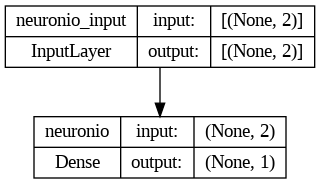

In [27]:
keras.utils.plot_model(modelo, show_shapes=True)

Pesos e viéses


Para identificar os pesos e viés que o modelo vai inicializar, podemos utilizar o método get_weights() e o método layers()

* layers: retorna uma lista contendo a camada do modelo criado.

* get_weights: coleta os pesos e vieses da camada enviada como objeto e o retorna como lista.

In [28]:
modelo.layers

In [29]:
modelo.layers[0].get_weights()

[array([[1.2998041 ],
        [0.85871327]], dtype=float32),
 array([0.], dtype=float32)]

In [30]:
peso, bias = modelo.layers[0].get_weights()
print(f"Pesos: {peso.shape}")
peso

Pesos: (2, 1)


array([[1.2998041 ],
       [0.85871327]], dtype=float32)

In [31]:
print(f"Pesos: {bias.shape}")
bias

Pesos: (1,)


array([0.], dtype=float32)

### Inicializando

É possivel definir os pesos e vieses antes de crair o modelo, para isso utilizamos dois parâmetros.

* kernel_initializer: inicializa a matriz de pesos do modelo

* bias_initializer: inicializa os valores de vieses

Para definir os pesos inciais, utlilizamos dois métodos de keras.initializers:


* keras.initializers.RandomNormal() para os pesos
* keras.initializers.Ones() para o bias

In [32]:
modelo = keras.Sequential([keras.layers.Dense(units=1, input_shape=[2], name="neuronio",
                                              kernel_initializer=keras.initializers.RandomNormal(),
                                              bias_initializer = keras.initializers.Ones())]) # Perceptron

In [33]:
modelo.layers[0].get_weights()

[array([[ 0.09094335],
        [-0.01218534]], dtype=float32),
 array([1.], dtype=float32)]

## Importando dados

In [34]:
from sklearn import datasets

In [35]:
iris = datasets.load_iris(return_X_y=True)
x = iris[0]
y = iris[1]
x

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [36]:
datasets.load_iris()['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [37]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [38]:
datasets.load_iris()['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

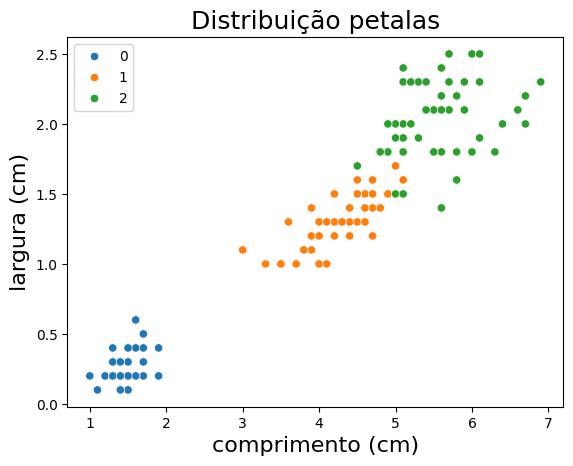

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(x=x[:,2], y=x[:,3], hue=y, palette='tab10')
plt.xlabel('comprimento (cm)', fontsize=16)
plt.ylabel('largura (cm)', fontsize=16)
plt.title('Distribuição petalas', fontsize=18)
plt.show()

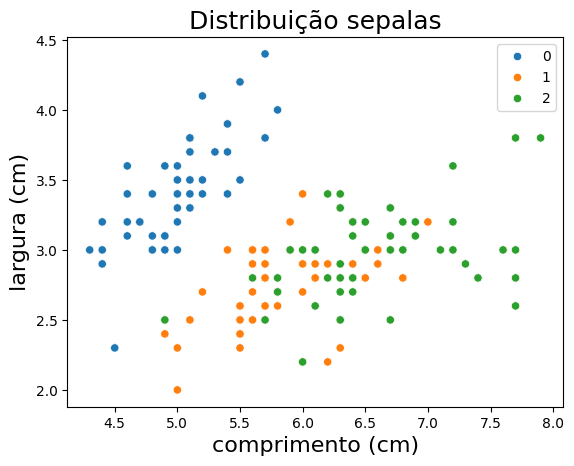

In [40]:
sns.scatterplot(x=x[:,0], y=x[:,1], hue=y, palette='tab10')
plt.xlabel('comprimento (cm)', fontsize=16)
plt.ylabel('largura (cm)', fontsize=16)
plt.title('Distribuição sepalas', fontsize=18)
plt.show()

## Tratamento

### Categorização

In [41]:
y.shape

(150,)

In [42]:
y = keras.utils.to_categorical(y)
y.shape

(150, 3)

In [43]:
y


array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0

## Normalização

Os dados serão normalizados entre [0,1], para isso utilizamos o método `MinMaxScaler`

In [44]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
x = scaler.fit_transform(x)

## Separação de conjunto

A separação em conjuntos de treino e teste garantem um melhor processo de criação do modelo.

80% - Treino
20% - Teste

In [48]:
from sklearn.model_selection import train_test_split

x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size=0.2, stratify=y, random_state=42)

In [53]:
x_treino.shape

(120, 4)

In [54]:
x_teste.shape

(30, 4)

In [55]:
y_treino.shape

(120, 3)

In [56]:
y_teste.shape

(30, 3)

## Modelo MLP

### Criação do modelo

Fazemos um modelo MLP definido por 1 camada de entrada, 1 camada oculta e 1 camada de saída.

### Modelo Sequencial

```python
modelo = keras.Sequential([...])
```

- `keras.Sequential`: Este é um tipo de modelo no Keras que é linearmente empilhado. Você pode criar um modelo `Sequential` e adicionar camadas a ele de maneira sequencial. Esse modelo é apropriado para uma pilha simples de camadas onde cada camada tem exatamente um tensor de entrada e um tensor de saída.

### Camada de Entrada

```python
keras.layers.InputLayer(input_shape=[4,], name='entrada')
```

- `keras.layers.InputLayer`: Define a camada de entrada do seu modelo. É aqui que você especifica a forma do tensor de entrada que sua rede espera. Neste caso, `input_shape=[4,]` indica que sua rede espera entradas com 4 características (por exemplo, 4 variáveis independentes em um problema de classificação ou regressão).

- `name='entrada'`: Este é um argumento nomeado que permite dar um nome específico a essa camada. Isso é útil para referência e visualização.

### Primeira Camada Densa

```python
keras.layers.Dense(512, activation='relu', name='oculta', kernel_initializer=keras.initializers.RandomNormal(seed=142))
```

- `keras.layers.Dense`: Esta é uma camada densamente conectada (também conhecida como camada totalmente conectada). Cada neurônio (ou unidade) em uma camada densa recebe entrada de todos os neurônios da camada anterior.

- `512`: Este é o número de neurônios ou unidades na camada densa. Uma maior quantidade de neurônios pode aumentar a capacidade do modelo de aprender padrões complexos, mas também pode levar a overfitting.

- `activation='relu'`: A função de ativação ReLU (Rectified Linear Unit) é usada para introduzir não-linearidades no modelo, o que permite que a rede aprenda relações complexas nos dados. A ReLU é definida como \(f(x) = max(0, x)\).

- `name='oculta'`: Dá um nome específico a esta camada, o que é útil para referência e visualização.

- `kernel_initializer=keras.initializers.RandomNormal(seed=142)`: Este argumento especifica o inicializador para os pesos da camada. `RandomNormal` inicializa os pesos com valores aleatórios seguindo uma distribuição normal (gaussiana). O `seed=142` garante que a inicialização dos pesos seja reproducível.

### Camada de Saída

```python
keras.layers.Dense(3, activation='softmax', name='saida')
```

- `3`: Este é o número de neurônios na camada de saída, que geralmente corresponde ao número de classes no seu problema de classificação. Neste caso, indica que há 3 classes possíveis para as quais a rede está fazendo previsões.

- `activation='softmax'`: A função de ativação softmax é usada na camada de saída de um problema de classificação multiclasse. Ela converte os logits (saídas lineares de uma camada) em probabilidades, garantindo que elas somem 1 e, portanto, possam ser interpretadas como probabilidades de classe.

- `name='saida'`: Nomeia a camada de saída, facilitando a referência e visualização.

In [62]:
modelo = keras.Sequential([keras.layers.InputLayer(input_shape=[4,], name='entrada'),
                           keras.layers.Dense(512, activation='relu', name='oculta',
                                              kernel_initializer=keras.initializers.RandomNormal(seed=142)),
                           keras.layers.Dense(3, activation='softmax', name='saida')])

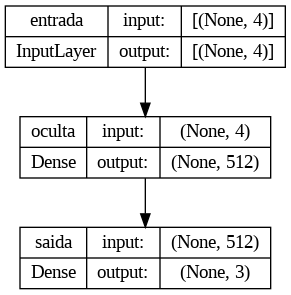

In [67]:
import keras
from tensorflow.keras.utils import plot_model


# Definição do modelo
modelo = keras.Sequential([
    keras.layers.InputLayer(input_shape=[4,], name='entrada'),
    keras.layers.Dense(512, activation='relu', name='oculta', kernel_initializer=keras.initializers.RandomNormal(seed=142)),
    keras.layers.Dense(3, activation='softmax', name='saida')
])

# Salvar a visualização da arquitetura do modelo
plot_model(modelo, to_file='modelo.png', show_shapes=True, show_layer_names=True)


In [69]:
modelo.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 oculta (Dense)              (None, 512)               2560      
                                                                 
 saida (Dense)               (None, 3)                 1539      
                                                                 
Total params: 4099 (16.01 KB)
Trainable params: 4099 (16.01 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## Treinamento

### Compilando o modelo
Compilar o modelo se dá pelo método `compile`. Nessa etapa devemos especificar a função de perda e otimizar a ser usado. Uma opção também é especificar as métricas a serem calculadas durante o treinamento e avaliação do modelo.

Compilação: Definir a função perda e a função de otimização.

In [70]:
modelo.compile(loss='categorical_crossentropy',
               optimizer='rmsprop',
               metrics=['categorical_accurac`'])

Explicação:

1. A perda escolida foi `categorical_accurac` pois os resultado em y são são valores categóricos.

2. O uso do otimizador `rmsprop` indica que iremos treinar o modelo baseado em gradiente descendente, que calcula a média móvel de gradientes quadrados para normalizar o gradiente (processo de retropropagação seráplicado ao realizar o treinamento)

3. Por esse modelo ser um classificador simples, é interessante calcular o valor da acurácia durante o treino e validação.

### Treino

O treinamento é feito com o método `fit`, sendo especificado as entradas e saídas de treino, épocas e também os dados de validação.

Explicação:
1. Para treinamento é preciso os dados de entradas e saídas do conjunto de treinamento.
2. Nesse caso o número de épocas também é essencial pois o padrão da biblioteca é 1 época, o que não é tao bom para o aprendizado.
3. Passamos também a porcentagem do conjunto de validação para semrem considerados do conjunto de treino -30% do conjunto de treino

Exemplo de exibição:

```
Epoch 100/100
3/3 [==============================] - 0s 47ms/step - loss: 0.1451 - categorical_accuracy: 0.9524 - val_loss: 0.1456 - val_categorical_accuracy: 0.9722
```

* A época de treinamento: Epoch 100/100
* Quantidade de instâncias processadas: 3/3
  * Aqui, temos a quantidade de amostras divididas pela número de batch_size. Normalmente a batch é definida com 32 no keras, temos 84 amostras (70% do conjunto de treino) no treinamento, resultando assim em aproximadamente 3 instâncias.
* A barra de progresso: [==============================]
* Tempo de treinamento de cada amostra: 0s 13ms/step
* Perda e acurária no conjunto de treinamento: loss: 0.1506 - categorical_accuracy: 0.9524
* Perda e acurária no conjunto de validação: val_loss: 0.1494 - val_categorical_accuracy: 0.9722



In [ ]:
epocas = 100
historico = modelo.fit(x_treino, y_treino,
                       epochs=epocas,
                       validation_split=0.3)

## Avaliação


* Aprendizado

Podemos avaliar o desempenho do nosso modelo durante o treinamento com os dados de `histórico`através do método `history`e plotar o processo de aprendizado.

In [72]:
historico.history

{'loss': [1.057037591934204,
  0.9896886944770813,
  0.9379410743713379,
  0.8985248804092407,
  0.8617735505104065,
  0.8281758427619934,
  0.7994126677513123,
  0.7765114307403564,
  0.7419501543045044,
  0.7185179591178894,
  0.6947451233863831,
  0.6694746613502502,
  0.6481214165687561,
  0.6248143315315247,
  0.605061948299408,
  0.5874290466308594,
  0.5709865093231201,
  0.5504347681999207,
  0.536252498626709,
  0.5211602449417114,
  0.5069388151168823,
  0.49234938621520996,
  0.478973388671875,
  0.4686294198036194,
  0.4604939818382263,
  0.4503062665462494,
  0.43830612301826477,
  0.42794710397720337,
  0.41913238167762756,
  0.41225606203079224,
  0.4064830541610718,
  0.397296667098999,
  0.39081868529319763,
  0.38174968957901,
  0.37640801072120667,
  0.3745836317539215,
  0.36537981033325195,
  0.3573681712150574,
  0.3510280251502991,
  0.34477147459983826,
  0.3383897542953491,
  0.3320271968841553,
  0.3249576985836029,
  0.31806692481040955,
  0.3137013912200928,

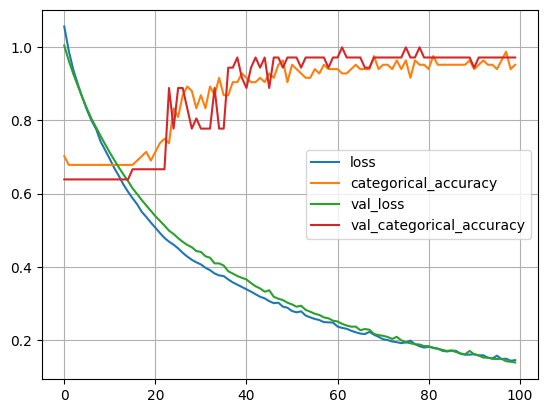

In [74]:
import pandas as pd

pd.DataFrame(historico.history).plot()
plt.grid()
plt.show()





Para observar mais de perto o aprendizado do modelo podemos plotar curvas individuais e perceber como no aprendizado, ambos os conjuntos obtiveram resultados similares. Isso nos garante que não ocorreu sobreajuste no treinamento.

A constancia das curvas é diferente pois os valores de erro da validação é calculada por época e para o treinamento é feito uma média dos valores de erro durante as iterações de cada época.




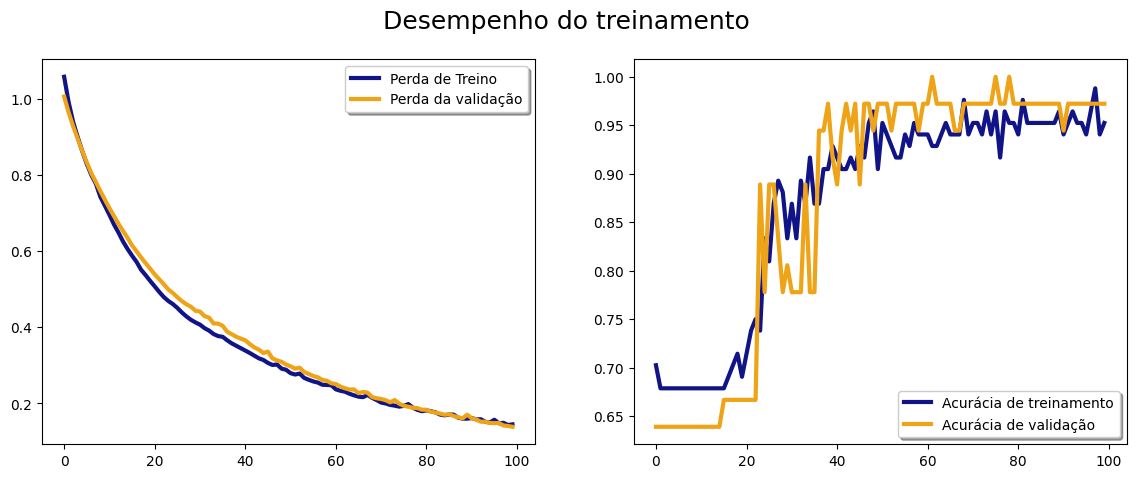

In [80]:
import matplotlib.pyplot as plt


fig, ax = plt.subplots(1, 2, figsize=(14, 5))
ax[0].plot(historico.history['loss'], color='#111487', linewidth=3, label="Perda de Treino")
ax[0].plot(historico.history['val_loss'], color='#EFA316', linewidth=3, label="Perda da validação")
legend = ax[0].legend(loc='best', shadow=True)


ax[1].plot(historico.history['categorical_accuracy'], color='#111487', linewidth=3, label="Acurácia de treinamento")
ax[1].plot(historico.history['val_categorical_accuracy'], color='#EFA316', linewidth=3, label="Acurácia de validação")
legend = ax[1].legend(loc='best', shadow=True)

plt.suptitle('Desempenho do treinamento', fontsize = 18)
plt.show()

## Teste

Podemos testar o modelo e verificar seu resultado final atraves do método evaluate que nos mostra a perda e acuracia obtida no conjunto de teste

In [78]:
modelo.evaluate(x_teste,y_teste)

1/1 [==============================] - 0s 33ms/step - loss: 0.1529 - categorical_accuracy: 0.9667


[0.15287253260612488, 0.9666666388511658]



O método predict gera a predição do modelo para as entradas enviadas.
`
Faremos o teste: as entradas `[[0.61, 0.5, 0.69, 0.79]]` devem resultar em uma indicação de flor Virginica - [0., 0., 1.]`


In [79]:

modelo.predict([[0.61, 0.5, 0.69, 0.79]])


1/1 [==============================] - 0s 484ms/step


array([[6.0722832e-05, 2.0029736e-01, 7.9964191e-01]], dtype=float32)